<h1 style="color:black;font-weight:bold">Image Processing & Analysis Assignment #2</h1>


In [ ]:
# Load libraries
import matplotlib.pyplot as plt # Library used for plotting
from matplotlib.patches import Rectangle # module to plot a rectangle in the image
import numpy as np # library for array manipulation
import seaborn as sn # plotting library
import pandas as pd # data frames library
import tifffile # library to store numpy arrays in TIFF
import skimage # Library for image manipulation
from skimage.io import imread # sublibrary from skimage
from scipy.ndimage import gaussian_filter
from skimage.filters import difference_of_gaussians
from skimage import transform
import os

In [2]:
import ipywidgets as widgets # Importing library
from ipywidgets import interact, interactive, HBox, Layout, VBox #  importing modules and functions.

In [3]:
conda install -c conda-forge ffmpeg

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import urllib.request

if not os.path.exists('./image_cell.tif'):
    url = 'https://ndownloader.figshare.com/files/26751209'
    urllib.request.urlretrieve(url, './image_cell.tif')

In [18]:
if not os.path.exists("./FISH_example.tif"):
    url = 'https://www.dropbox.com/s/669j6zags6xd7gr/FISH_example.tif?dl=1'
    urllib.request.urlretrieve(url, './FISH_example.tif')

In [4]:
img = imread('./image_cell.tif')
img.shape

(35, 512, 512, 3)

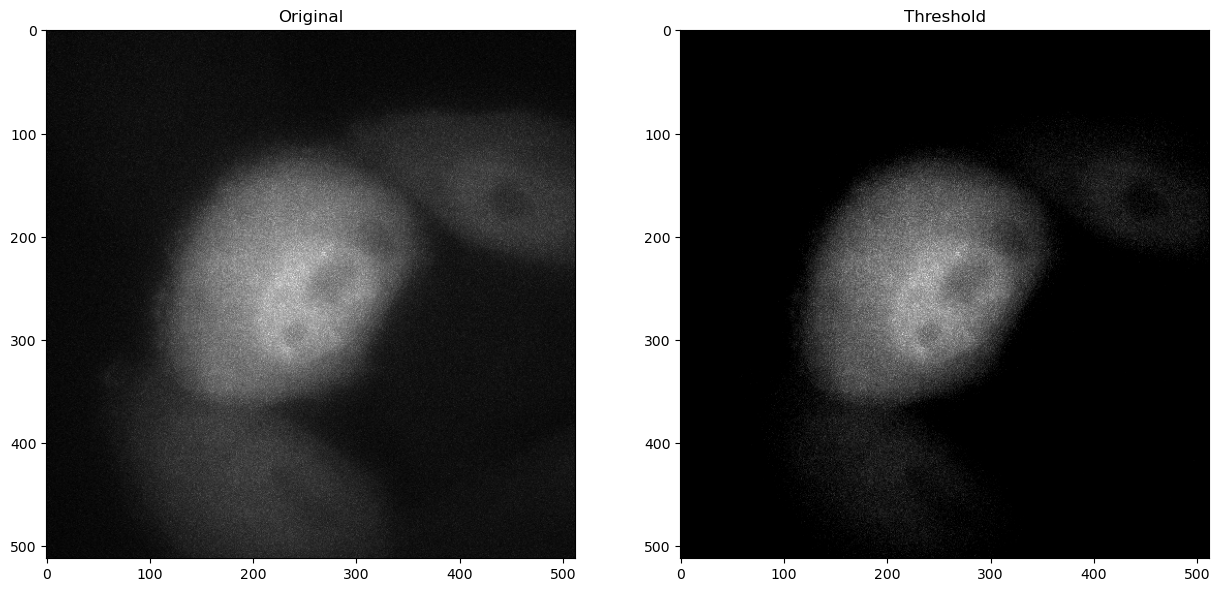

In [21]:
# Task 1
## make an image `img1` from just the red channel (channel 0) at time point 23 of the tensor [T,Y,X,C]  

# add your code here
img1 = img[23,0:512,0:512,0] # change as appropriate

# Task 2
## Using `img1`, create a new image `img2` where values less than than the mean are set to the 
## background value (calculated as the minimum intensity value in the image).
imgCopy = img1.copy()
imgSection= imgCopy[0:512,0:512]
imgSection[imgSection < np.mean(imgSection) ]=np.mean(imgSection)
img2 = imgSection

# plot the results
# Side-by-side comparizon
fig, ax = plt.subplots(1,2, figsize=(15, 7))
ax[0].imshow(img1,cmap='gray')
ax[0].set(title='Original')

ax[1].imshow(img2,cmap='gray')
ax[1].set_title('Threshold')
plt.show()

<h1 style="color:black;font-weight:bold">Task 3</h1>


Set img2[0:20,0:20] = np.amax(img2) (Make a white box in the image to more easily visualize the transformation)


Compress img2 in half, rotate it 30 degrees clockwise, and translate its (0,0) to (dx,dy)=(200,100)


Save resulting image as img3


Plot img3 side-by-side with img2

Transformation matrix : 
 [[ 4.97260948e-01 -5.22642316e-02  2.00000000e+02]
 [ 5.22642316e-02  4.97260948e-01  1.00000000e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]] 



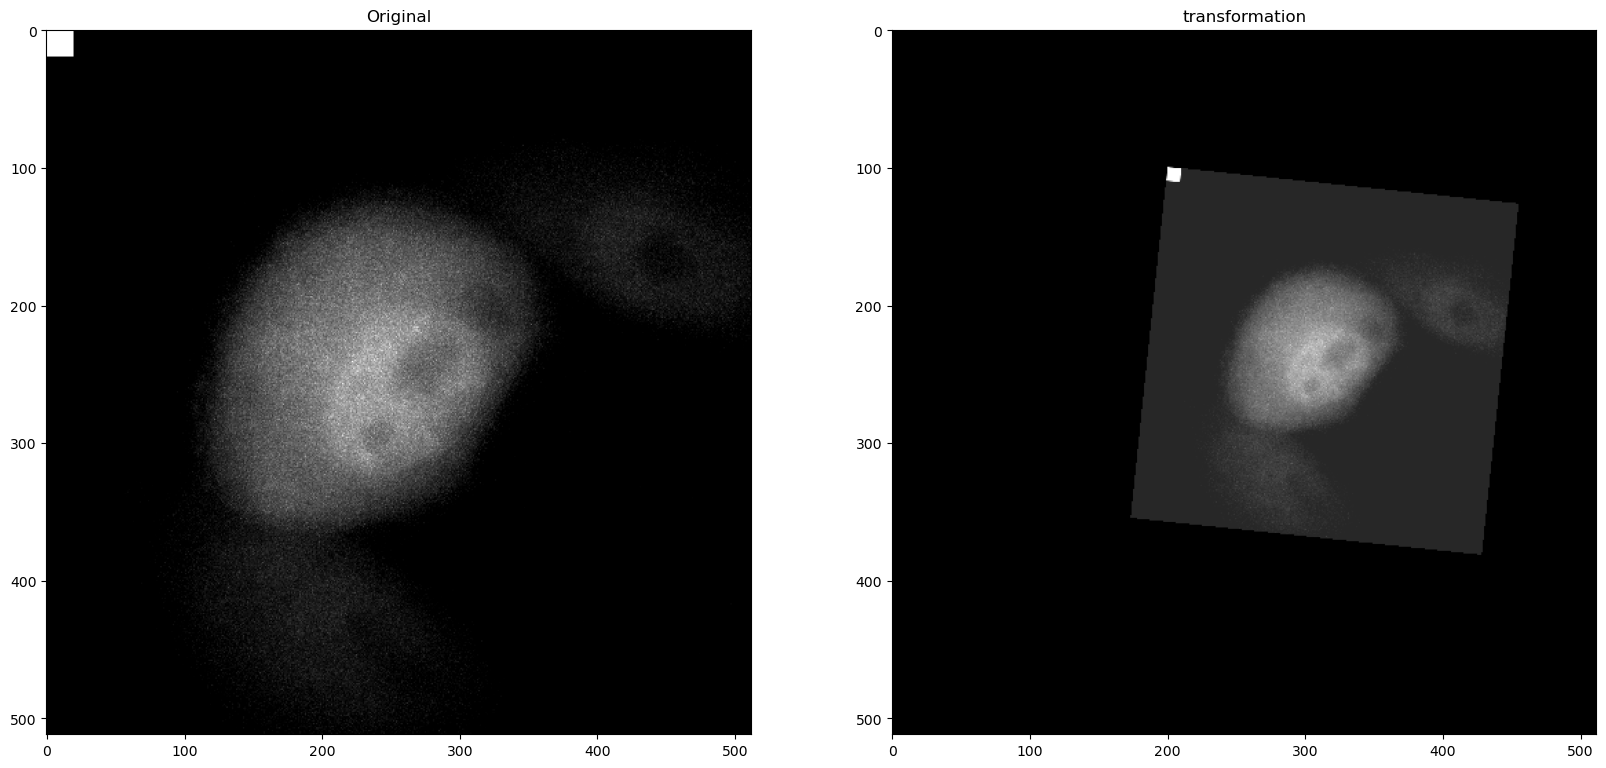

In [16]:
# Make a white box
img2[0:20,0:20] = np.amax(img2)
#  transformation matrix
tform = transform.SimilarityTransform( # modify as appropriate
    scale = 0.5,# float, scaling value
    rotation = np.pi/30,# Rotation angle in counter-clockwise direction as radians. pi/180 rad = 1 degrees
    translation=(200, 100))# (dx, dy) values for translation
print('Transformation matrix : \n', tform.params , '\n')

# Apply the transformation
img3 = transform.warp(img2, tform.inverse)

# plot the results
# Side-by-side comparizon
fig, ax = plt.subplots(1,2, figsize=(20, 10))
ax[0].imshow(img2,cmap='gray')
ax[0].set(title='Original')
ax[1].imshow(img3,cmap='gray')
ax[1].set_title('transformation')
plt.show()

<h1 style="color:black;font-weight:bold">Task 5</h1>


Make a slice of img_FISH and save as img_FISH_slice using: Z=10, Y=120:350, X=50:250

Apply a Gaussian filter to img_FISH_slice with sigma=1 and save it as img_gaussian_filter_simga_1

Make difference of Gaussians filter of img_FISH_slice using low_sigma=1 and high_sigma=5 and img_diff_gaussians


Plot all 3 images side-by-side (in 3 subplots).

In [29]:
# importing the FISH image as variable img_FISH
img_FISH = imread('./FISH_example.tif') 

# Make a slice of the sequence of images
img_FISH_slice = img_FISH[10, 120:350, 50:250] # modify as appropriate
img_gaussian_filter_simga_1 = gaussian_filter(img_FISH_slice, sigma = 1) # modify as appropriate
img_diff_gaussians = difference_of_gaussians(img_section,low_sigma=1, high_sigma=5) # modify as appropriate

C:\Users\nadir\AppData\Local\Temp\ipykernel_13872\3495856836.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if img_diff_gaussians != []:


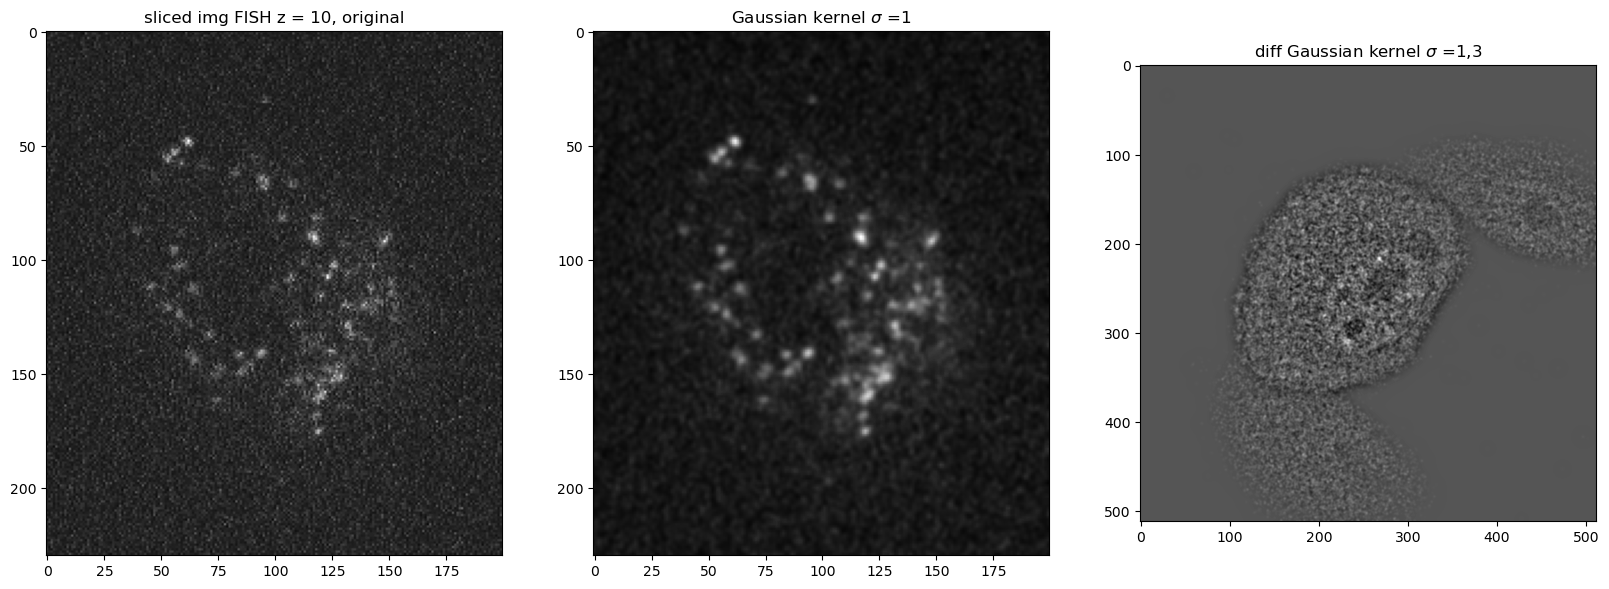

In [30]:
# The code below should plot your results for Task 5 once the variables are defined correctly
if img_diff_gaussians != []:
    fig, ax = plt.subplots(1,3, figsize=(20, 10))
    ax[0].imshow(img_FISH_slice,cmap='gray')
    ax[0].set(title='sliced img FISH z = 10, original')
    ax[1].imshow(img_gaussian_filter_simga_1,cmap='gray')
    ax[1].set(title='Gaussian kernel $\sigma$ =1')
    ax[2].imshow(img_diff_gaussians,cmap='gray')
    ax[2].set(title='diff Gaussian kernel $\sigma$ =1,3')
    plt.show()